<a href="https://colab.research.google.com/github/qas95/Data-Analysis-Business-Intelligence/blob/main/Seattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./Seattle_Police.csv')

## 1 - CAD CDW ID

In [ ]:
m = df.loc[df['CAD CDW ID'].isna()]
df['CAD CDW ID'][m.index]

144   NaN
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
Name: CAD CDW ID, dtype: float64

##### **Lets look at the values above and below these NaN values**

In [ ]:
df['CAD CDW ID'][142:152]

142    15882.0
143    15883.0
144        NaN
145        NaN
146        NaN
147        NaN
148        NaN
149        NaN
150    15890.0
151    15891.0
Name: CAD CDW ID, dtype: float64

##### **These values are in a range with every value increasing by 1. Hence I will use the interpolate method to fill the values**

In [ ]:
df['CAD CDW ID'] = df['CAD CDW ID'].interpolate()

In [ ]:
df['CAD CDW ID'][142:152] # As you can see they are all filled now. Lets look for more erroneous data.

142    15882.0
143    15883.0
144    15884.0
145    15885.0
146    15886.0
147    15887.0
148    15888.0
149    15889.0
150    15890.0
151    15891.0
Name: CAD CDW ID, dtype: float64

##### **Looking for values that are out of range or erroneous. e.g values with more than 7 digits**

In [ ]:
df['CAD CDW ID'] = df['CAD CDW ID'].astype(str)

In [ ]:
df['CAD CDW ID'].str.len().value_counts()  # These values don't match the pattern(>7 digits) and are erroneous values.

7    9864
9     136
Name: CAD CDW ID, dtype: int64

In [ ]:
#Lets set these values to NaN first

a = df[df['CAD CDW ID'].str.len()>7]
df['CAD CDW ID'].iloc[a.index] = np.nan

In [ ]:
# Replaced all with NaN

df['CAD CDW ID'][a.index] 

48      NaN
69      NaN
104     NaN
189     NaN
254     NaN
       ... 
9854    NaN
9855    NaN
9861    NaN
9917    NaN
9994    NaN
Name: CAD CDW ID, Length: 136, dtype: object

In [ ]:
df['CAD CDW ID'] = df['CAD CDW ID'].astype(float)

In [ ]:
# Updating the NaN by adding 1 to their previous value

for i in a.index: 
    df['CAD CDW ID'].iloc[i] = (df['CAD CDW ID'].iloc[i-1])+1

In [ ]:
df['CAD CDW ID'][a.index]

48      15786.0
69      15807.0
104     15842.0
189     15930.0
254     15997.0
         ...   
9854    25780.0
9855    25781.0
9861    25787.0
9917    25845.0
9994    25923.0
Name: CAD CDW ID, Length: 136, dtype: float64

In [ ]:
df['CAD CDW ID'].isna().sum() # RECHECK

0

## 2 CAD Event Number

**1** - Copied (bfill) the value from General Offense Number to Null values in CAD event Number. <br>
**2** - Replacing "2016" with 10000 and "2010" with 10000 in the column to conform to the pattern. Using REGEX

In [ ]:
a2 = df[df['CAD Event Number'].isna()].head()
a2

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
29,15766.0,NaN,2010246426,280.0,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,7/17/10 20:46,9XX BLOCK OF NE 50TH ST,U,U3,5301.2004,-122.317921,47.664941,"(47.664940729, -122.317920862)",NaN,NaN,NaN,NaN
30,15767.0,NaN,2010246213,470.0,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,7/17/10 20:48,3XX BLOCK OF TAYLOR AVE N,D,D1,7200.1022,-122.346293,47.621317,"(47.621316912, -122.346293035)",NaN,NaN,NaN,NaN
31,15768.0,NaN,2010246429,245.0,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,7/17/10 20:48,2XX BLOCK OF THOMAS ST,D,D1,7100.2001,-122.352168,47.620924,"(47.620924048, -122.352168318)",NaN,NaN,NaN,NaN
32,15769.0,NaN,2010246463,177.0,LIQUOR VIOLATION - INTOXICATED PERSON,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,7/17/10 20:49,1XX BLOCK OF BROADWAY E,E,E1,7400.3005,-122.320864,47.619324,"(47.619323644, -122.320863687)",NaN,NaN,NaN,NaN
33,15770.0,NaN,2010246305,160.0,PROWLER,PROWLER,PROWLER,7/17/10 20:49,3XX BLOCK OF HARRISON ST,D,D1,7100.2001,-122.350854,47.622087,"(47.622086915, -122.350854033)",NaN,NaN,NaN,NaN


In [ ]:
cols = ['CAD Event Number','General Offense Number']
df.loc[:,cols] = df.loc[:,cols].bfill(axis = 1)

In [ ]:
df[28:33] # As you can see the values have been copied. Now lets pluck out the starting digits.

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
28,15765.0,1.00002e+10,2010246224,184.0,"NARCOTICS, OTHER",NARCOTICS COMPLAINTS,NARCOTICS COMPLAINTS,7/17/10 20:42,21XX BLOCK OF ALASKAN WAY,M,M3,8001.3023,-122.346955,47.610378,"(47.610378237, -122.346954703)",NaN,NaN,NaN,NaN
29,15766.0,2010246426,2010246426,280.0,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,7/17/10 20:46,9XX BLOCK OF NE 50TH ST,U,U3,5301.2004,-122.317921,47.664941,"(47.664940729, -122.317920862)",NaN,NaN,NaN,NaN
30,15767.0,2010246213,2010246213,470.0,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,7/17/10 20:48,3XX BLOCK OF TAYLOR AVE N,D,D1,7200.1022,-122.346293,47.621317,"(47.621316912, -122.346293035)",NaN,NaN,NaN,NaN
31,15768.0,2010246429,2010246429,245.0,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,7/17/10 20:48,2XX BLOCK OF THOMAS ST,D,D1,7100.2001,-122.352168,47.620924,"(47.620924048, -122.352168318)",NaN,NaN,NaN,NaN
32,15769.0,2010246463,2010246463,177.0,LIQUOR VIOLATION - INTOXICATED PERSON,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,7/17/10 20:49,1XX BLOCK OF BROADWAY E,E,E1,7400.3005,-122.320864,47.619324,"(47.619323644, -122.320863687)",NaN,NaN,NaN,NaN


In [ ]:
#Will replace only '2010' & 2016' from the entire digits and replace with 10000 and 160000 respectively
df['CAD Event Number'] = df['CAD Event Number'].replace({'2010':'10000', '2016':'160000'}, regex=True)

In [ ]:
df[28:33] #check it out to confirm.

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
28,15765.0,1.00002e+10,2010246224,184.0,"NARCOTICS, OTHER",NARCOTICS COMPLAINTS,NARCOTICS COMPLAINTS,7/17/10 20:42,21XX BLOCK OF ALASKAN WAY,M,M3,8001.3023,-122.346955,47.610378,"(47.610378237, -122.346954703)",NaN,NaN,NaN,NaN
29,15766.0,10000246426,2010246426,280.0,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,7/17/10 20:46,9XX BLOCK OF NE 50TH ST,U,U3,5301.2004,-122.317921,47.664941,"(47.664940729, -122.317920862)",NaN,NaN,NaN,NaN
30,15767.0,10000246213,2010246213,470.0,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,7/17/10 20:48,3XX BLOCK OF TAYLOR AVE N,D,D1,7200.1022,-122.346293,47.621317,"(47.621316912, -122.346293035)",NaN,NaN,NaN,NaN
31,15768.0,10000246429,2010246429,245.0,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,7/17/10 20:48,2XX BLOCK OF THOMAS ST,D,D1,7100.2001,-122.352168,47.620924,"(47.620924048, -122.352168318)",NaN,NaN,NaN,NaN
32,15769.0,10000246463,2010246463,177.0,LIQUOR VIOLATION - INTOXICATED PERSON,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,7/17/10 20:49,1XX BLOCK OF BROADWAY E,E,E1,7400.3005,-122.320864,47.619324,"(47.619323644, -122.320863687)",NaN,NaN,NaN,NaN


In [ ]:
df['CAD Event Number'].isna().sum()

0

## 3 Event Clearance Code

**MAP() to fill the NAs**<br>

1- Creating a mapping of Event Clearance description and Event Clearance Code. <br>
2- Then, using this mapping to fill the NA values in column : Event Clearance description

In [ ]:
a3 = df[df['Event Clearance Code'].isna()].head()
a3

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
6,15743.0,1.00002e+10,2010246472,NaN,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,7/17/10 21:05,56XX BLOCK OF BROOKLYN AVE NE,U,U3,4400.5003,-122.314166,47.670345,NaN,NaN,NaN,NaN,NaN
7,15744.0,1.00002e+10,2010246493,NaN,LIQUOR VIOLATION - INTOXICATED PERSON,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,7/17/10 21:09,15XX BLOCK OF 4TH AVE,K,K1,8100.2005,-122.336891,47.610440,NaN,NaN,NaN,NaN,NaN
8,15745.0,1.00002e+10,2010246478,NaN,MENTAL COMPLAINT,MENTAL CALL,MENTAL HEALTH,7/17/10 21:17,100XX BLOCK OF COLLEGE WAY N,N,N3,1300.1009,-122.334524,47.702332,NaN,NaN,NaN,NaN,NaN
9,15746.0,1.00002e+10,2010246397,NaN,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,7/17/10 21:18,46XX BLOCK OF S AUSTIN ST,S,S2,11101.3001,-122.273985,47.534705,NaN,NaN,NaN,NaN,NaN
10,15747.0,1.00002e+10,2010246518,NaN,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,7/17/10 21:28,3XX BLOCK OF HARRISON ST,D,D1,7100.2001,-122.350854,47.622087,NaN,NaN,NaN,NaN,NaN


In [ ]:
desc_code = df.dropna(subset=['Event Clearance Code']).drop_duplicates('Event Clearance Description').set_index('Event Clearance Description')['Event Clearance Code']
desc_code

Event Clearance Description
THEFT - MISCELLANEOUS                                       65.0
MISCHIEF, NUISANCE COMPLAINTS                              250.0
TRAFFIC (MOVING) VIOLATION                                 460.0
SUSPICIOUS VEHICLE                                         281.0
MENTAL COMPLAINT                                           220.0
                                                           ...  
HARBOR - ASSIST BOATER (NON EMERGENCY)                     343.0
SEX OFFENDER - FAILURE TO REGISTER                         143.0
SOAP (STAY OUT OF AREA OF PROSTITUTION) ORDER VIOLATION    127.0
HOMICIDE                                                    10.0
MARIJUANA PUBLIC USE (NOT DISPENSARY)                      188.0
Name: Event Clearance Code, Length: 95, dtype: float64

In [ ]:
df['Event Clearance Code'] = df['Event Clearance Code'].fillna(df['Event Clearance Description'].map(desc_code))

In [ ]:
df[5:11] # Confirm to see if the right codes have been filled

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
5,15742.0,1.00002e+10,2010246436,220.0,MENTAL COMPLAINT,MENTAL CALL,MENTAL HEALTH,7/17/10 21:04,50XX BLOCK OF 57TH AVE S,R,R3,10200.1012,-122.263332,47.555956,"(47.555955852, -122.263332426)",NaN,NaN,NaN,NaN
6,15743.0,1.00002e+10,2010246472,460.0,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,7/17/10 21:05,56XX BLOCK OF BROOKLYN AVE NE,U,U3,4400.5003,-122.314166,47.670345,NaN,NaN,NaN,NaN,NaN
7,15744.0,1.00002e+10,2010246493,177.0,LIQUOR VIOLATION - INTOXICATED PERSON,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,7/17/10 21:09,15XX BLOCK OF 4TH AVE,K,K1,8100.2005,-122.336891,47.610440,NaN,NaN,NaN,NaN,NaN
8,15745.0,1.00002e+10,2010246478,220.0,MENTAL COMPLAINT,MENTAL CALL,MENTAL HEALTH,7/17/10 21:17,100XX BLOCK OF COLLEGE WAY N,N,N3,1300.1009,-122.334524,47.702332,NaN,NaN,NaN,NaN,NaN
9,15746.0,1.00002e+10,2010246397,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,7/17/10 21:18,46XX BLOCK OF S AUSTIN ST,S,S2,11101.3001,-122.273985,47.534705,NaN,NaN,NaN,NaN,NaN
10,15747.0,1.00002e+10,2010246518,245.0,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,7/17/10 21:28,3XX BLOCK OF HARRISON ST,D,D1,7100.2001,-122.350854,47.622087,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Event Clearance Code'].isna().sum()

0

### 4 Event Clearance Group
**MAP()**

In [ ]:
map1= df.dropna(subset=['Event Clearance Group']).drop_duplicates('Event Clearance SubGroup').set_index('Event Clearance SubGroup')['Event Clearance Group']

In [ ]:
df['Event Clearance Group'] = df['Event Clearance Group'].fillna(df['Event Clearance SubGroup'].map(map1))

In [ ]:
df['Event Clearance Group'].isna().sum()

0

### Event Clearance SubGroup
**MAP()**

In [ ]:
subgroup_desc = df.dropna(subset=['Event Clearance SubGroup']).drop_duplicates('Event Clearance Description').set_index('Event Clearance Description')['Event Clearance SubGroup']

In [ ]:
df['Event Clearance SubGroup'] = df['Event Clearance SubGroup'].fillna(df['Event Clearance Description'].map(subgroup_desc))

In [ ]:
df['Event Clearance SubGroup'].isna().sum()

0

### Event Clearance Description'


In [ ]:
c_desc = df.dropna(subset=['Event Clearance Description']).drop_duplicates(['Event Clearance Code']).set_index('Event Clearance Code')['Event Clearance Description']

In [ ]:
df['Event Clearance Description'] = df['Event Clearance Description'].fillna(df['Event Clearance Code'].map(c_desc))

### Hundred Block Location

In [ ]:
print("Null Values before")
df['Hundred Block Location'].isna().sum()

Null Values before


6

In [ ]:
incid_loc_hblock = df.dropna(subset=['Hundred Block Location']).drop_duplicates(['Incident Location']).set_index('Incident Location')['Hundred Block Location']

In [ ]:
df['Hundred Block Location'] = df['Hundred Block Location'].fillna(df['Incident Location'].map(incid_loc_hblock))

In [ ]:
df['Hundred Block Location'].isna().sum() #Only 2 NAs removed. No duplicate values for other to create mappings. These 4 values are unique.

4

### Zone/Beat

In [ ]:
df['Zone/Beat'].isna().sum()

26

In [ ]:
df['Zone/Beat'].unique()


array(['Q1', 'M2', 'D1', 'R3', 'U3', 'K1', 'N3', 'S2', 'K2', 'F3', 'S3',
       'Q3', 'D2', 'J2', 'L3', 'J3', 'W1', 'U2', 'R2', 'M3', 'E1', 'L1',
       'E2', nan, 'W3', 'N2', 'R1', 'L2', 'J1', 'G3', 'G2', 'C2', 'B1',
       'S1', 'M1', 'F1', 'G1', 'B2', 'K3', 'B3', 'C1', 'O1', 'C3', 'U1',
       'D3', 'Q2', 'N1', 'O2', 'W2', 'E3', 'F2', 'O3', '99'], dtype=object)

In [ ]:
df['Zone/Beat'] = df['Zone/Beat'].replace('99', np.nan)

In [ ]:
Census_Zone = df.dropna(subset=['Zone/Beat']).drop_duplicates(['Census Tract']).set_index('Census Tract')['Zone/Beat']
df['Zone/Beat'] = df['Zone/Beat'].fillna(df['Census Tract'].map(Census_Zone))

In [ ]:
df['Zone/Beat'].isna().sum() # Some left since no matching values in mapping group for these values.

6

### District/Sector

In [ ]:
#df['District/Sector'] = df['District/Sector'].astype(str)
df['District/Sector'].isna().sum()

14

In [ ]:
df['District/Sector'].unique()

array(['Q', 'M', 'D', 'R', 'U', 'K', 'N', 'S', 'F', 'J', 'L', 'W', 'E',
       'C', 'G', 'B', 'O', nan, '99'], dtype=object)

In [ ]:
df['District/Sector'] = df['District/Sector'].replace('99', np.nan)
df['District/Sector'].isna().sum()

31

In [ ]:
Zone_District = df.dropna(subset=['District/Sector']).drop_duplicates('Zone/Beat').set_index(['Zone/Beat'])['District/Sector']
df['District/Sector'] = df['District/Sector'].fillna(df['Zone/Beat'].map(Zone_District))

In [ ]:
df['District/Sector'].isna().sum()

0

### Incident Location

**Since the Incident location is a combination of Latitude and Longitude, let's join them and put inplace of NAs in Incident Location Column

In [ ]:
df['Incident Location'].isna().sum()

2469

In [ ]:
a = df[df['Incident Location'].isna()].index

In [ ]:
df.iloc[a].head()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
6,15743.0,1.00002e+10,2010246472,460.0,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,7/17/10 21:05,56XX BLOCK OF BROOKLYN AVE NE,U,U3,4400.5003,-122.314166,47.670345,NaN,NaN,NaN,NaN,NaN
7,15744.0,1.00002e+10,2010246493,177.0,LIQUOR VIOLATION - INTOXICATED PERSON,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,7/17/10 21:09,15XX BLOCK OF 4TH AVE,K,K1,8100.2005,-122.336891,47.610440,NaN,NaN,NaN,NaN,NaN
8,15745.0,1.00002e+10,2010246478,220.0,MENTAL COMPLAINT,MENTAL CALL,MENTAL HEALTH,7/17/10 21:17,100XX BLOCK OF COLLEGE WAY N,N,N3,1300.1009,-122.334524,47.702332,NaN,NaN,NaN,NaN,NaN
9,15746.0,1.00002e+10,2010246397,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,7/17/10 21:18,46XX BLOCK OF S AUSTIN ST,S,S2,11101.3001,-122.273985,47.534705,NaN,NaN,NaN,NaN,NaN
10,15747.0,1.00002e+10,2010246518,245.0,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,7/17/10 21:28,3XX BLOCK OF HARRISON ST,D,D1,7100.2001,-122.350854,47.622087,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Incident Location'] = df['Incident Location'].fillna(( '(' +df['Latitude'].astype(str) + ',-' + df['Longitude'].astype(str)+ ')' ))

In [ ]:
df.iloc[a].head()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
6,15743.0,1.00002e+10,2010246472,460.0,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,7/17/10 21:05,56XX BLOCK OF BROOKLYN AVE NE,U,U3,4400.5003,-122.314166,47.670345,"(47.67034535,--122.3141656)",NaN,NaN,NaN,NaN
7,15744.0,1.00002e+10,2010246493,177.0,LIQUOR VIOLATION - INTOXICATED PERSON,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,7/17/10 21:09,15XX BLOCK OF 4TH AVE,K,K1,8100.2005,-122.336891,47.610440,"(47.61044025,--122.33689050000001)",NaN,NaN,NaN,NaN
8,15745.0,1.00002e+10,2010246478,220.0,MENTAL COMPLAINT,MENTAL CALL,MENTAL HEALTH,7/17/10 21:17,100XX BLOCK OF COLLEGE WAY N,N,N3,1300.1009,-122.334524,47.702332,"(47.70233163,--122.3345243)",NaN,NaN,NaN,NaN
9,15746.0,1.00002e+10,2010246397,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,7/17/10 21:18,46XX BLOCK OF S AUSTIN ST,S,S2,11101.3001,-122.273985,47.534705,"(47.53470464,--122.2739848)",NaN,NaN,NaN,NaN
10,15747.0,1.00002e+10,2010246518,245.0,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,7/17/10 21:28,3XX BLOCK OF HARRISON ST,D,D1,7100.2001,-122.350854,47.622087,"(47.62208692,--122.350854)",NaN,NaN,NaN,NaN


In [ ]:
df['Incident Location'].isna().sum() # All values filled

0

### General Offense Number

- There are a few string values in this column, lets get rid of them <br>
- I converted the column to numeric so that strings will be set as NaN <br>
- Then I filled the NaN with values from CAD Event Number <br>
- Finally changed the starting digits from 10000 to 2010....etc using REGEX <br>

In [ ]:
df['General Offense Number'] = pd.to_numeric(df['General Offense Number'], errors='coerce')

In [ ]:
a5 = df[df['General Offense Number'].isna()]
a5.head(3)

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
0,15737.0,1.00002e+10,NaN,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,7/17/30 20:50,36XX BLOCK OF DISCOVERY PARK BLVD,Q,Q1,5700.1012,-122.404613,47.658325,"(47.658324899, -122.404612874)",NaN,NaN,NaN,NaN
27,15764.0,1.00002e+10,NaN,64.0,SHOPLIFT,THEFT,SHOPLIFTING,7/17/40 20:39,5XX BLOCK OF PINE ST,K,K1,8200.1004,-122.335929,47.611904,"(47.611904236, -122.335928554)",NaN,NaN,NaN,NaN
94,15833.0,1.00002e+10,NaN,177.0,LIQUOR VIOLATION - INTOXICATED PERSON,LIQUOR VIOLATIONS,LIQUOR VIOLATIONS,7/17/10 22:50,8XX BLOCK OF DENNY WAY,M,M2,7200.1039,-122.340602,47.618543,"(47.61854329, -122.340602321)",NaN,NaN,NaN,NaN


In [ ]:
c = ['CAD Event Number','General Offense Number']

In [ ]:
df.loc[:,c] = df.loc[:,c].ffill(axis = 1)

In [ ]:
df['General Offense Number'] = df['General Offense Number'].astype(str)
df['General Offense Number'] = df['General Offense Number'].replace({'10000':'2010','160000':'2016'}, regex = True)

In [ ]:
df['General Offense Number'].isna().sum()

0

### Event Clearance Date

**Looked for dates in range and found invalid values which were not in range**

In [ ]:
df['Event Clearance Date'] = pd.to_datetime(df['Event Clearance Date'], errors = 'coerce')

In [ ]:
a = df['Event Clearance Date']
Startdate = pd.to_datetime('1/1/2000')
Enddate = pd.to_datetime('1/1/2018')

In [ ]:
error_dates1 = df.loc[df['Event Clearance Date'] < Startdate, : ]
error_dates2 = df.loc[df['Event Clearance Date'] > Enddate, :]

In [ ]:
df['Event Clearance Date'] = df['Event Clearance Date'].astype(str)
error = df['Event Clearance Date'][error_dates2.index].to_list() + df['Event Clearance Date'][error_dates1.index].to_list()

In [ ]:
error # List of all Erroneous Dates

['2030-07-17 20:50:00',
 '2040-07-17 20:39:00',
 '2033-07-18 00:12:00',
 '2021-07-18 00:04:00',
 '1710-07-25 07:12:00']

In [ ]:
df['Event Clearance Date'] = df['Event Clearance Date'].replace(dict.fromkeys(['2030', '2040','2033','2021'],'2010'), regex = True)

In [ ]:
df['Event Clearance Date'].iloc[error_dates2.index] # As you can see, the dates are now in proper range

0      2010-07-17 20:50:00
27     2010-07-17 20:39:00
90     2010-07-18 00:12:00
205    2010-07-18 00:04:00
Name: Event Clearance Date, dtype: object

### Hundred Block Location - Invalid(anomalies)

Looked for any string less than length of 10, which resulted in a list of country/city names

In [ ]:
df['Hundred Block Location'].isna().sum()

4

In [ ]:
mask = (df[df['Hundred Block Location'].str.len() <14])
mask.head(2)

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
11,15748.0,1.00002e+10,2010246470.0,161.0,TRESPASS,TRESPASS,TRESPASS,2010-07-17 21:28:00,Canada,K,K2,9100.1014,-122.327681,47.596655,"(47.59665538,--122.3276807)",NaN,NaN,NaN,NaN
1680,17462.0,1.00002e+10,2010249050.0,280.0,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,2010-07-19 23:18:00,Alaska,G,G3,8800.5007,-122.298169,47.611560,"(47.611560252, -122.298168661)",NaN,NaN,NaN,NaN


In [ ]:
df.loc[mask.index]['Hundred Block Location']

11             Canada
1680           Alaska
5718     Pennsylvania
7352         Brooklyn
7359        Manhattan
7826    Washington DC
Name: Hundred Block Location, dtype: object

In [ ]:
df['Hundred Block Location'].iloc[mask.index] = np.nan

In [ ]:
Long_HBloc = df.dropna(subset=['Hundred Block Location']).drop_duplicates(['Longitude']).set_index('Longitude')['Hundred Block Location']

In [ ]:
df['Hundred Block Location'] = df['Hundred Block Location'].fillna(df['Longitude'].map(Long_HBloc))

In [ ]:
df['Hundred Block Location'].isna().sum()            #    4 values left, as they are unique and don't a match in the mappings group.

4

**For the last 4 columns, there are so many NA values and they little in common with other columns to retrieve the lost data <br>
Hence will lose this data**

In [ ]:
df = df.drop(['Initial Type Description', 'Initial Type Subgroup','Initial Type Group','At Scene Time'], axis = 1)

In [ ]:
df.isna().sum()

CAD CDW ID                      0
CAD Event Number                0
General Offense Number          0
Event Clearance Code            0
Event Clearance Description     0
Event Clearance SubGroup        0
Event Clearance Group           0
Event Clearance Date            0
Hundred Block Location          4
District/Sector                 0
Zone/Beat                       6
Census Tract                   18
Longitude                       0
Latitude                        0
Incident Location               0
dtype: int64

**Since there are only a few null values, we will drop these values, given they are unique and have no match in any of the mappings-group to find their value.**

In [ ]:
df = df.dropna() # Only 28 values lost out of 10,000

In [ ]:
df.isna().sum()

CAD CDW ID                     0
CAD Event Number               0
General Offense Number         0
Event Clearance Code           0
Event Clearance Description    0
Event Clearance SubGroup       0
Event Clearance Group          0
Event Clearance Date           0
Hundred Block Location         0
District/Sector                0
Zone/Beat                      0
Census Tract                   0
Longitude                      0
Latitude                       0
Incident Location              0
dtype: int64

In [ ]:
df.to_csv('/Users/qas/Desktop/cleanedSeattle.csv')

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(df, "District/Sector", var_name="measurement")

In [ ]:
c = df['District/Sector'].value_counts()

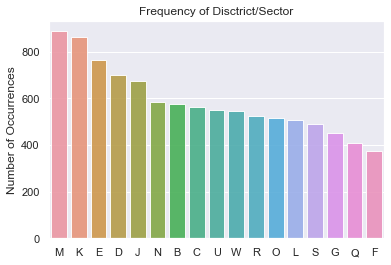

In [ ]:
sns.set(style="darkgrid")
sns.barplot(c.index, c.values, alpha=0.9)
plt.title('Frequency of Disctrict/Sector')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

## **Visualization in Tableau**

![a1.png](attachment:a1.png)

![a2.png](attachment:a2.png)